### This data exploration works on 1st round cleaned dataset  - Motorway, A(M) and A road only

* Data from 2014 are taken as an example. Other years' data will also be checked if needed.
* Analyze important columns.
* Compare the results on different sets of class of road. (within or without A roads?)

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import folium
from IPython.display import display
%matplotlib inline
matplotlib.style.use('ggplot')

# Total number of accidents

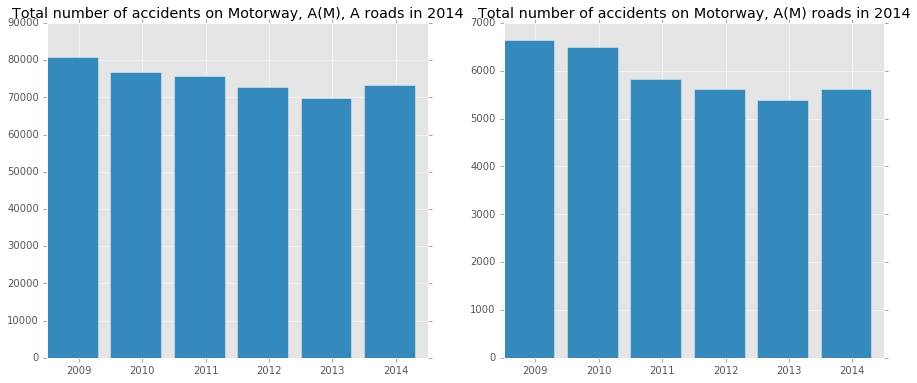

In [56]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n1 = [0]*6
n2 = [0]*6
i = 0
for year in years:
    df = pd.read_csv('data1/Accidents_' + year + '.csv', low_memory=False)
    n1[i] = len(df)
    df = df[df['1st_Road_Class'] < 3]
    n2[i] = len(df)
    i += 1
x = range(6)
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.bar(x, n1)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], years)
plt.title('Total number of accidents on Motorway, A(M), A roads in 2014')

plt.subplot(1,2,2)
plt.bar(x, n2)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], years)
plt.title('Total number of accidents on Motorway, A(M) roads in 2014')

The trends are similar on both part of roads in 2014

# Accident Severity

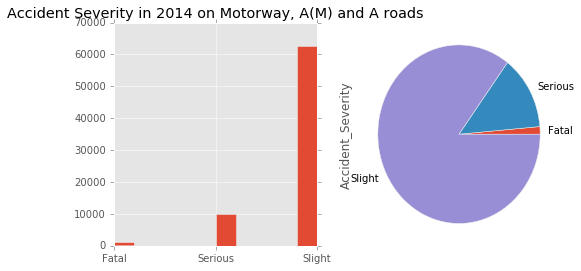

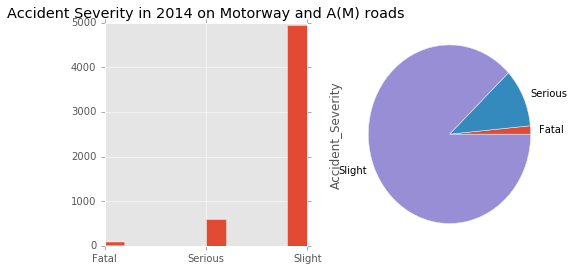

In [62]:
%matplotlib inline
df1 = pd.read_csv('data1/Accidents_2014.csv',low_memory=False)
df2 = df1[df1['1st_Road_Class'] < 3] # on Motorways and A(M) roads only
df1 = df1['Accident_Severity']
df2 = df2['Accident_Severity']
i = 0
for df in [df1,df2]:
    plt.figure(figsize = (8,4))
    plt.subplot(1,2,1)
    df.hist()
    plt.xticks([1,2,3],['Fatal', 'Serious','Slight'])
    if i == 0:
        plt.title('Accident Severity in 2014 on Motorway, A(M) and A roads')
    else:
        plt.title('Accident Severity in 2014 on Motorway and A(M) roads')

    plt.subplot(1,2,2)
    s = df.value_counts()
    s = s.reindex([1,2,3])
    labels = ['Fatal', 'Serious','Slight']
    s.plot.pie(labels = labels)
    plt.show()
    i += 1

The percentage of serious accidents on Motorway and A(M) roads is less than that on all three types of roads

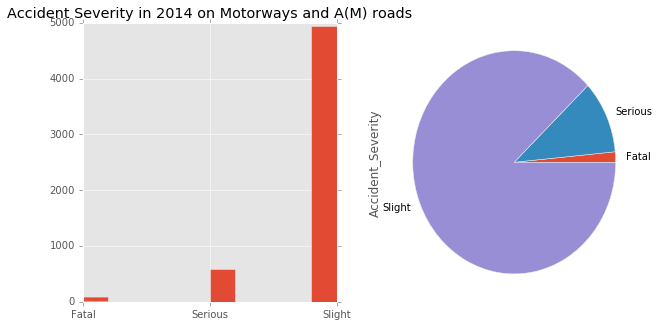

In [57]:
%matplotlib inline
df = pd.read_csv('data1/Accidents_2014.csv',low_memory=False)
df = df[df['1st_Road_Class'] < 3] # on Motorways and A(M) roads only
df = df['Accident_Severity']
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df.hist()
plt.xticks([1,2,3],['Fatal', 'Serious','Slight'])
plt.title('Accident Severity in 2014 on Motorways and A(M) roads')

plt.subplot(1,2,2)
s = df.value_counts()
s = s.reindex([1,2,3])
labels = ['Fatal', 'Serious','Slight']
s.plot.pie(labels = labels)
plt.show()

,2009,2010,2011,2012,2013,2014
Accident_Severity,,,,,,
Fatal,1278,1077,1133,976,1002,1002
Serious,10735,10026,10323,10037,9471,9891
Slight,68779,65671,64252,61768,59347,62565


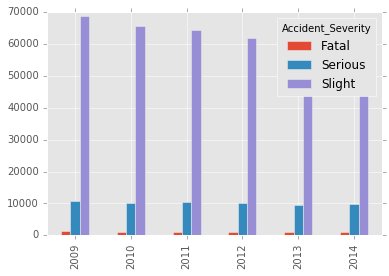

In [74]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
d = {}
for year in years:
    df = pd.read_csv('data1/Accidents_' + year + '.csv', low_memory=False)
    n[i] = df['Accident_Severity'].value_counts()
    d[year] = n[i]

df = pd.DataFrame(d,index = [1,2,3])
df['Accident_Severity'] = pd.Series(['Fatal', 'Serious','Slight'],index=[1,2,3])
df = df.set_index('Accident_Severity')
display(df)
df2 = df.T
df2.plot.bar()

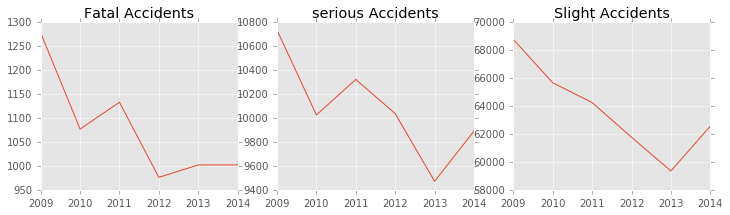

In [89]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
df2['Fatal'].plot()
plt.title('Fatal Accidents')
plt.subplot(1,3,2)
df2['Serious'].plot()
plt.title('serious Accidents')
plt.subplot(1,3,3)
df2['Slight'].plot()
plt.title('Slight Accidents')

In 2014, the total number of accidents increased. Accordingly, the number of serious and slight accidents rised. But the number of fatal accidents stay at the same level as last year(2013)

# Number of Vehicles

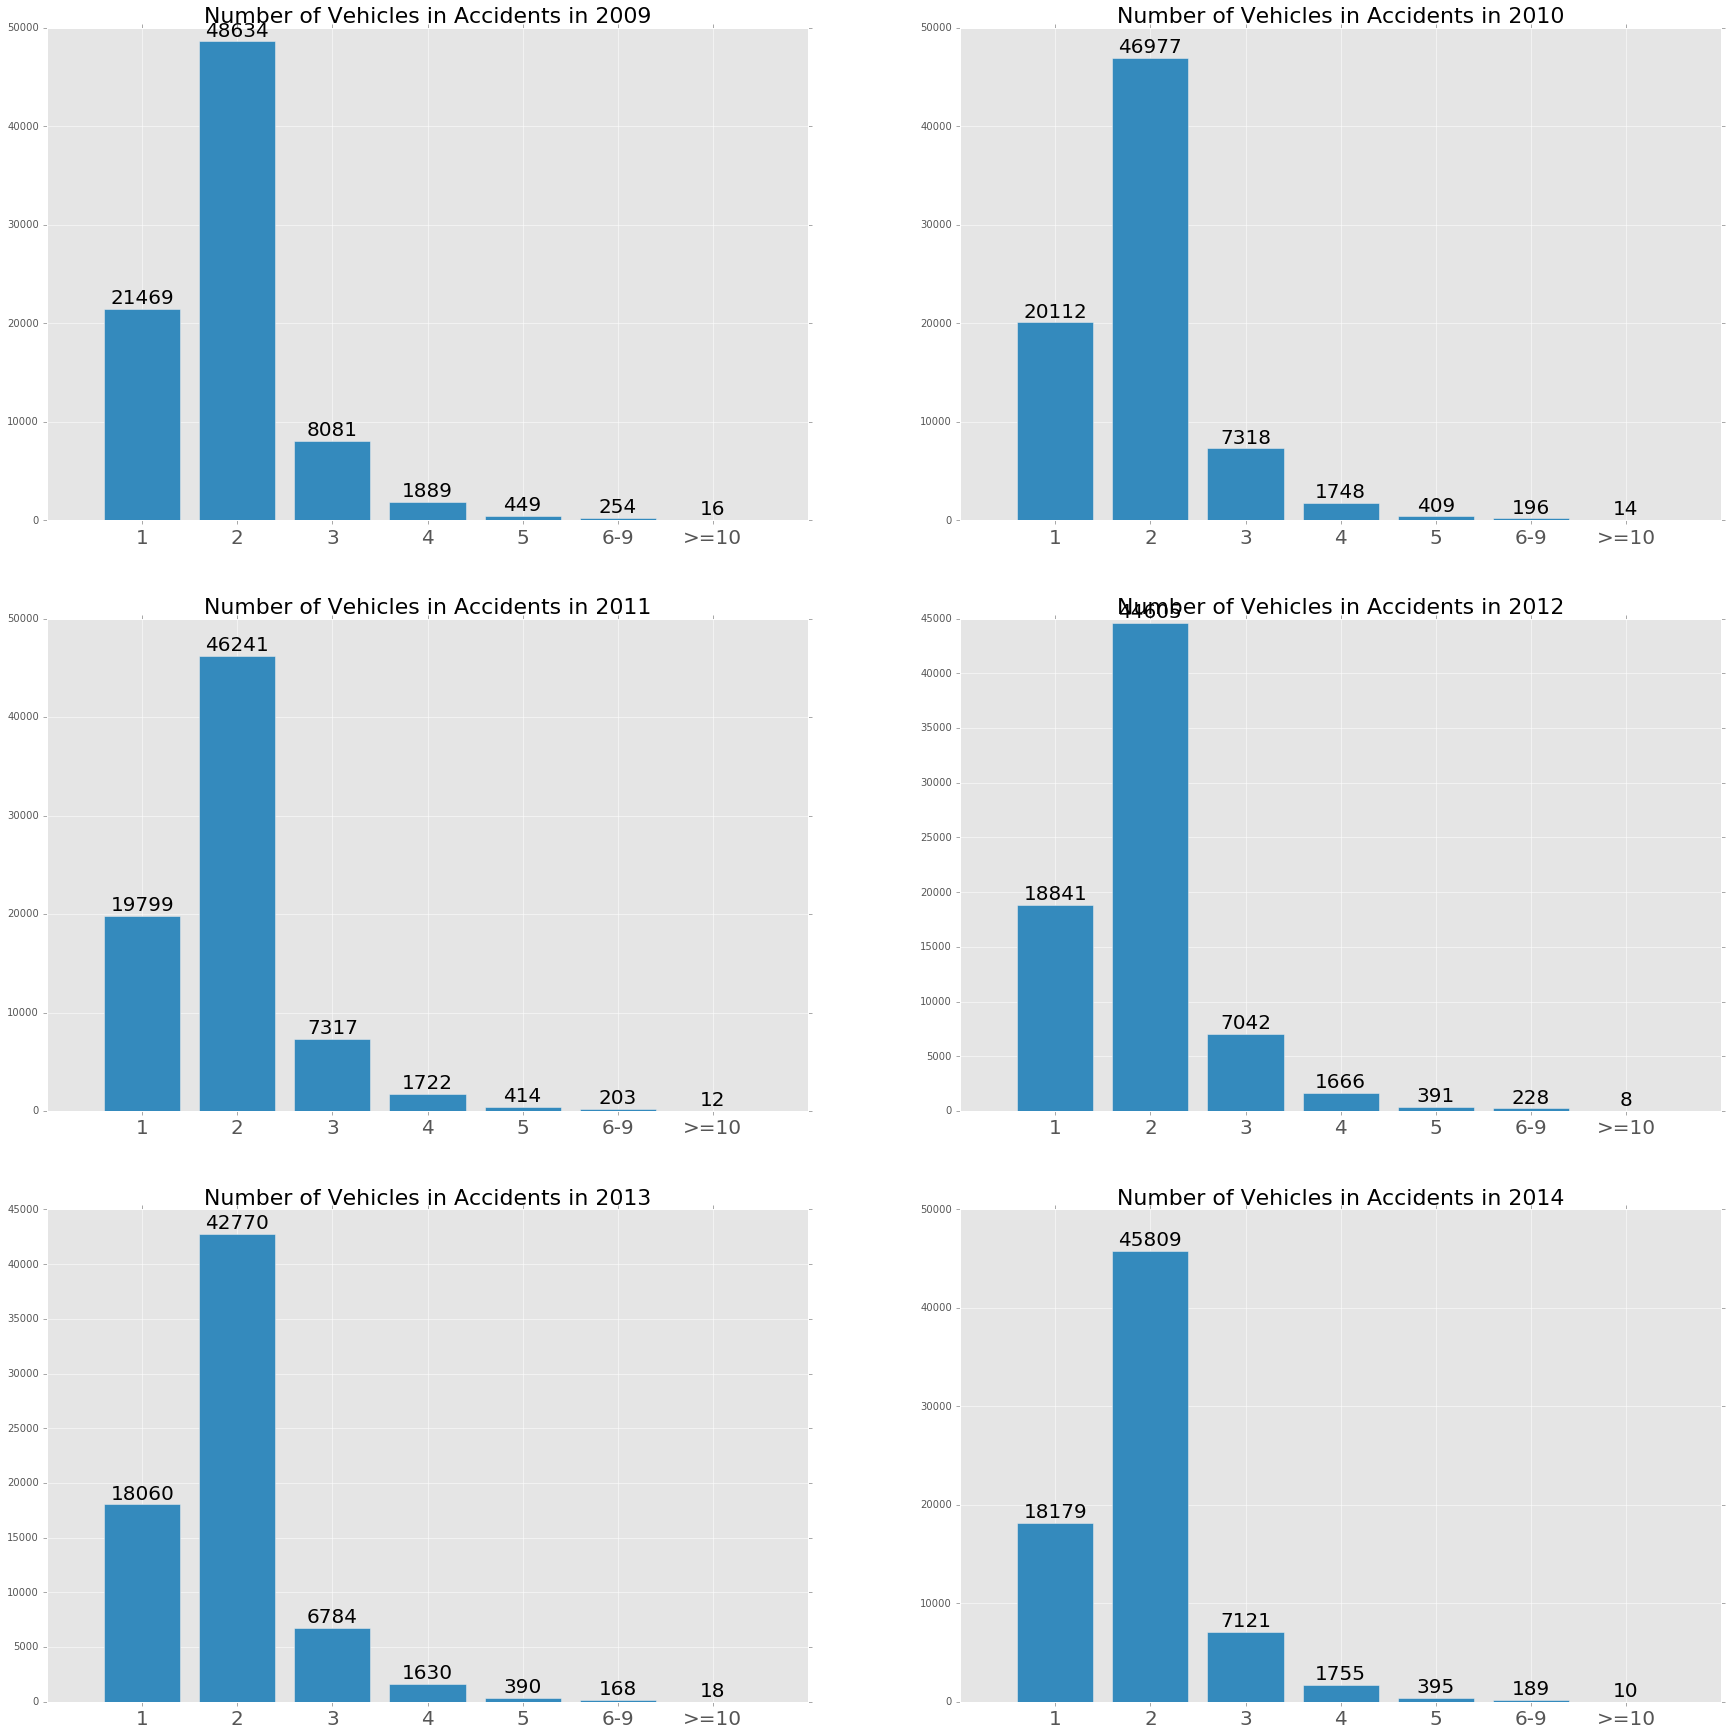

In [21]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
plt.figure(figsize = (30,30))
nfig = 1
for year in years:
    df = pd.read_csv('data1/Accidents_' + year + '.csv',low_memory=False)
    s = df['Number_of_Vehicles'].value_counts()
    bins = [0]*7
    s = s.sort_index(axis = 0, ascending = True)
    for i in range(6):
        bins[i] = s[i+1]
    bins[5] = sum(s.loc[6:9])
    bins[6] = sum(s.loc[10:])
    plt.subplot(3,2,nfig)
    index = range(1,8)
    plt.bar(index, bins,align = 'center')
    labels = ['1','2','3','4','5','6-9','>=10']
    plt.title('Number of Vehicles in Accidents in ' + year, fontsize = 22)
    plt.xticks(index,labels, fontsize = 20)
    for j, v in zip(index, bins):
        plt.text(j, v+100, v, ha='center', va='bottom',fontsize = 20)
    nfig += 1

In each year, the most common accidents covering two cars, than the number of 1 car and 2 cars accident rank the 2nd and 3rd respectively.  

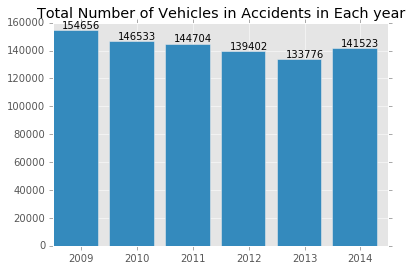

In [27]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
for year in years:
    df = pd.read_csv('data1/Accidents_' + year + '.csv', low_memory=False)
    n[i] = df['Number_of_Vehicles'].sum()
    i += 1
x = range(6)
plt.figure()
plt.bar(x, n)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], years)
plt.title('Total Number of Vehicles in Accidents in Each year')
for j, v in zip(x, n):
        plt.text(j+0.5, v+100, v, ha='center', va='bottom')

The trend of total number of vehicles in accident during these 6 years is quite similar to the total number of accidents in these years.

# Number of Casualties

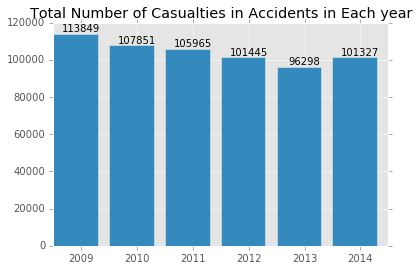

In [32]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
for year in years:
    df = pd.read_csv('data1/Accidents_' + year + '.csv', low_memory=False)
    n[i] = df['Number_of_Casualties'].sum()
    i += 1
x = range(6)
plt.figure()
plt.bar(x, n)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], years)
plt.title('Total Number of Casualties in Accidents in Each year')
for j, v in zip(x, n):
        plt.text(j+0.5, v+100, v, ha='center', va='bottom')

The trend of total number of casualties is also very similar to the trend of the number of accidents during these years.

### Total number of casualties on Motorway, A(M), A roads
The information of casualties is recorded in another dataset. It is related to accident dataset by accident_index. I selected casualties in accidents on Motorway, A(M) and A roads from casualty dataset.

Check the correctness of data selection on casualty dataset.

The graph is the same as above, so we selected data from target roads on casualties dataset successfully.

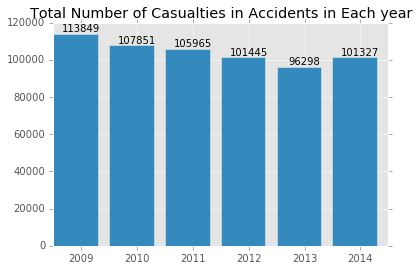

In [33]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
for year in years:
    df = pd.read_csv('data1/Casualties_' + year + '.csv', low_memory=False)
    n[i] = len(df)
    i += 1
x = range(6)
plt.figure()
plt.bar(x, n)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5], years)
plt.title('Total Number of Casualties in Accidents in Each year')
for j, v in zip(x, n):
        plt.text(j+0.5, v+100, v, ha='center', va='bottom')

**Columns of casualty dataset:**

[u'Acc_Index', u'Vehicle_Reference', u'Casualty_Reference',
       u'Casualty_Class', u'Sex_of_Casualty', u'Age_Band_of_Casualty',
       u'Casualty_Severity', u'Pedestrian_Location', u'Pedestrian_Movement',
       u'Car_Passenger', u'Bus_or_Coach_Passenger',
       u'Pedestrian_Road_Maintenance_Worker', u'Casualty_Type',
       u'Casualty_Home_Area_Type']

### 1. Casualty Severity

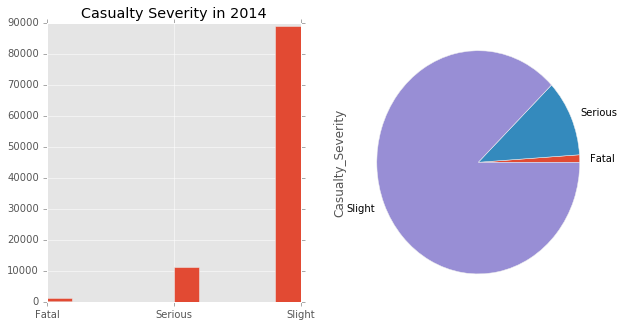

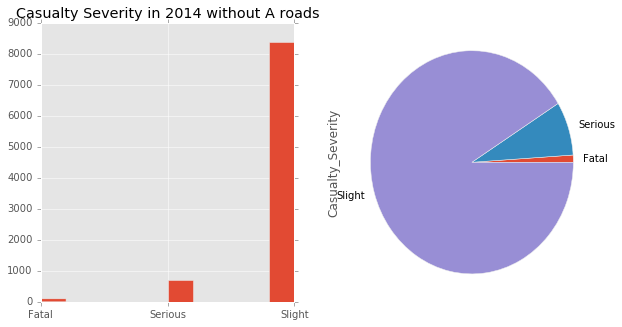

In [74]:
%matplotlib inline
df1 = pd.read_csv('data1/Casualties_2014.csv',low_memory=False)
df1 = df1['Casualty_Severity']
df2 = pd.read_csv('data1/Casualties_M_2014.csv',low_memory=False)
df2 = df2['Casualty_Severity']
i = 0
for df in [df1,df2]:
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    df.hist()
    plt.xticks([1,2,3],['Fatal', 'Serious','Slight'])
    if i==0:
        plt.title('Casualty Severity in 2014')
    else:
        plt.title('Casualty Severity in 2014 without A roads')

    plt.subplot(1,2,2)
    s = df.value_counts()
    s = s.reindex([1,2,3])
    labels = ['Fatal', 'Serious','Slight']
    s.plot.pie(labels = labels)
    i += 1

In [76]:
print df1.value_counts()
print df2.value_counts()

3    88995
2    11242
1     1090
Name: Casualty_Severity, dtype: int64
3    8391
2     718
1      96
Name: Casualty_Severity, dtype: int64


The bar chart and pie chart here are very similar to those of accident severity in 2014. 

Also, the percentage of serious casualties is less while not considering A roads.

The persentages of KIS on roads within and without A roads are 12.1% and 8.8% respectively.

,2009,2010,2011,2012,2013,2014
Casualty_Severity,,,,,,
Fatal,1399,1168,1215,1055,1076,1090
Serious,12423,11363,11658,11339,10747,11242
Slight,100027,95320,93092,89051,84475,88995


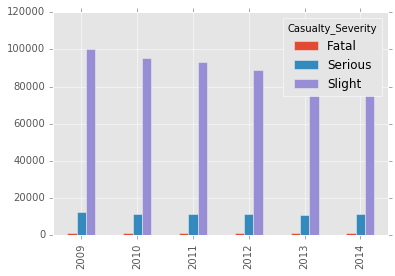

In [36]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
d = {}
for year in years:
    df = pd.read_csv('data1/Casualties_' + year + '.csv', low_memory=False)
    n[i] = df['Casualty_Severity'].value_counts()
    d[year] = n[i]

df = pd.DataFrame(d,index = [1,2,3])
df['Casualty_Severity'] = pd.Series(['Fatal', 'Serious','Slight'],index=[1,2,3])
df = df.set_index('Casualty_Severity')
display(df)
df2 = df.T
df2.plot.bar()

**Fatal and serious casualties**

,2009,2010,2011,2012,2013,2014
Casualty_Severity,,,,,,
Fatal,1399,1168,1215,1055,1076,1090
Serious,12423,11363,11658,11339,10747,11242


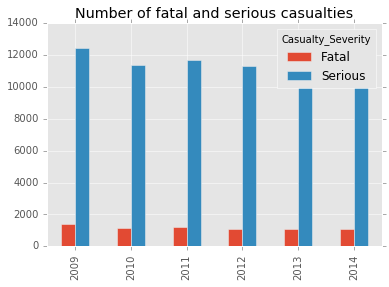

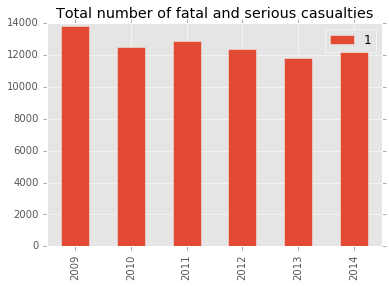

In [32]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
n = [0]*6
i = 0
d = {}
d3 = {}
for year in years:
    df = pd.read_csv('data1/Casualties_' + year + '.csv', low_memory=False)
    n[i] = df['Casualty_Severity'].value_counts()
    d[year] = n[i]
    d3[year] = len(df[df['Casualty_Severity']<3])

df = pd.DataFrame(d,index = [1,2])
df['Casualty_Severity'] = pd.Series(['Fatal', 'Serious'],index=[1,2])
df = df.set_index('Casualty_Severity')
display(df)
df2 = df.T
df3 = pd.DataFrame(d3, index=[1])
df3 = df3.T

#plt.figure(figsize = (20,5))
#plt.subplot(1,2,1)
df2.plot.bar()
plt.title('Number of fatal and serious casualties')

#plt.subplot(1,2,2)
df3.plot.bar()
plt.title('Total number of fatal and serious casualties')

### 2. Casualty Class

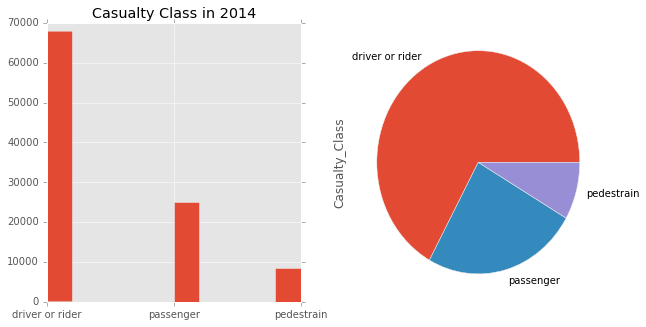

In [5]:
%matplotlib inline
df = pd.read_csv('data1/Casualties_2014.csv',low_memory=False, encoding="utf-8-sig")
df = df[u'Casualty_Class']
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df.hist()
plt.xticks([1,2,3],['driver or rider', 'passenger','pedestrian'])
plt.title('Casualty Class in 2014')

plt.subplot(1,2,2)
s = df.value_counts()
s = s.reindex([1,2,3])
labels = ['driver or rider', 'passenger','pedestrian']
s.plot.pie(labels = labels)
plt.show()

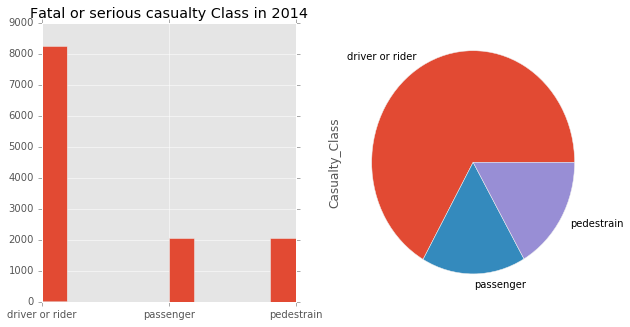

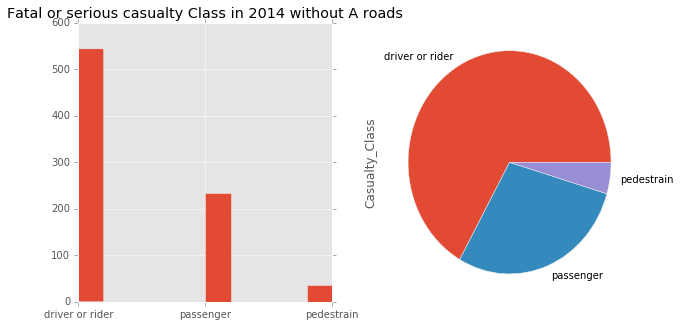

In [68]:
%matplotlib inline
df1 = pd.read_csv('data1/Casualties_2014.csv',low_memory=False, encoding="utf-8-sig")
df1 = df1[df1[u'Casualty_Severity']<3]
df1 = df1[u'Casualty_Class']
df2 = pd.read_csv('data1/Casualties_M_2014.csv',low_memory=False, encoding="utf-8-sig")
df2 = df2[df2[u'Casualty_Severity']<3]
df2 = df2[u'Casualty_Class']
i = 0
for df in [df1,df2]:
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    df.hist()
    plt.xticks([1,2,3],['driver or rider', 'passenger','pedestrian'])
    if i == 0:
        plt.title('Fatal or serious casualty Class in 2014')
    else:
        plt.title('Fatal or serious casualty Class in 2014 without A roads')
    plt.subplot(1,2,2)
    s = df.value_counts()
    s = s.reindex([1,2,3])
    labels = ['driver or rider', 'passenger','pedestrian']
    s.plot.pie(labels = labels)
    plt.show()
    i+=1

When it comes to fatal or serious casualties, the percentage of pedestrain casualty increases. And the percentage of passenger casualty decreases. Therefore, pedestrians are more vulnerable in an accident. 

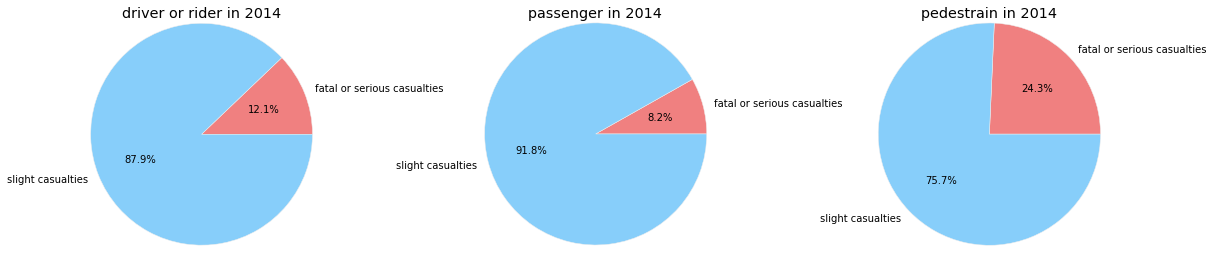

In [36]:
%matplotlib inline
df = pd.read_csv('data1/Casualties_2014.csv',low_memory=False, encoding="utf-8-sig")
df1 = df[u'Casualty_Class']   # all casualties
org = df1.value_counts()
org = org.reindex([1,2,3])

df2 = df[df[u'Casualty_Severity']<3]  # fatal or serious casualties
df2 = df2[u'Casualty_Class']
kis = df2.value_counts()
kis = kis.reindex([1,2,3])
c_class = ['driver or rider', 'passenger','pedestrian']
ptg = kis/org
plt.figure(figsize=(20,4))
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.pie([ptg[i], 1-ptg[i]],autopct='%1.1f%%', labels = ['fatal or serious casualties', 'slight casualties'], 
            colors = ['lightcoral', 'lightskyblue'])
    plt.axis('equal')
    plt.title(c_class[i-1] + ' in 2014')

Nearly one quarter pedestrian casualties are killed or serious injured in accidents.

### Without A roads:

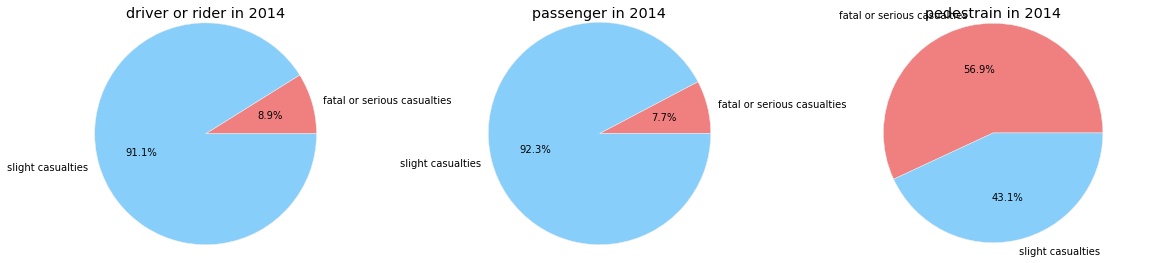

In [77]:
%matplotlib inline
df = pd.read_csv('data1/Casualties_M_2014.csv',low_memory=False, encoding="utf-8-sig")
df1 = df[u'Casualty_Class']   # all casualties
org = df1.value_counts()
org = org.reindex([1,2,3])

df2 = df[df[u'Casualty_Severity']<3]  # fatal or serious casualties
df2 = df2[u'Casualty_Class']
kis = df2.value_counts()
kis = kis.reindex([1,2,3])
c_class = ['driver or rider', 'passenger','pedestrian']
ptg = kis/org
plt.figure(figsize=(20,4))
plt.title('Pecentage of fatal or serious casualties on Motorway and A(M) roads only')
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.pie([ptg[i], 1-ptg[i]],autopct='%1.1f%%', labels = ['fatal or serious casualties', 'slight casualties'], 
            colors = ['lightcoral', 'lightskyblue'])
    plt.axis('equal')
    plt.title(c_class[i-1] + ' in 2014')

## Day of Week

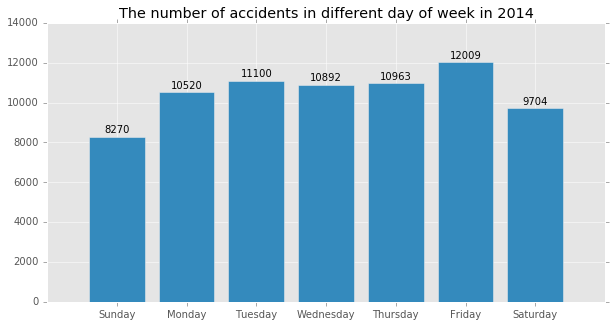

In [42]:
%matplotlib inline
df = pd.read_csv('data1/Accidents_2014.csv',low_memory=False)
df = df['Day_of_Week']
plt.figure(figsize = (10,5))
s = df.value_counts()
x = range(1,8)
s = s.reindex(x)
plt.bar(x, s, align = 'center')
plt.xticks([1,2,3,4,5,6,7],['Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('The number of accidents in different day of week in 2014')

for j, v in zip(x, s):
        plt.text(j, v+100, v, ha='center', va='bottom')

### *** <font color='red'>On Motorway and A(M) roads:</font> 

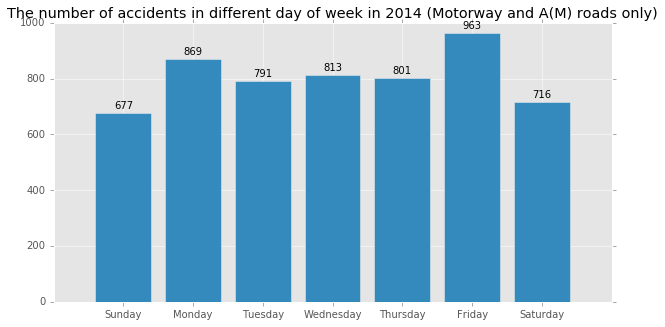

In [44]:
%matplotlib inline
df = pd.read_csv('data1/Accidents_2014.csv',low_memory=False)
df = df[df['1st_Road_Class'] <3]   # Motorway and A(M) roads only
df = df['Day_of_Week']
plt.figure(figsize = (10,5))
s = df.value_counts()
x = range(1,8)
s = s.reindex(x)
plt.bar(x, s, align = 'center')
plt.xticks([1,2,3,4,5,6,7],['Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('The number of accidents in different day of week in 2014 (Motorway and A(M) roads only)')

for j, v in zip(x, s):
        plt.text(j, v+10, v, ha='center', va='bottom')

In [78]:
df= pd.read_csv('data/DfTRoadSafety_Accidents_2014.csv',low_memory=False)
df['1st_Road_Class'].value_counts()

3    67828
6    41322
4    18573
5    12969
1     5246
2      384
Name: 1st_Road_Class, dtype: int64

### A1 road

In [7]:
df = pd.read_csv('data/DfTRoadSafety_Accidents_2014.csv',low_memory=False)
rst = df[df['1st_Road_Class'] == 3] # A roads
rst = rst[rst['1st_Road_Number'] == 1]
Long = rst.Longitude
Lat = rst.Latitude
severity = rst.Accident_Severity
se_color = {1:'#000000', 2: '#FF0000', 3:'#FF8400'}  #fatal: black; serious: red; slight: orange
map_osm = folium.Map(location=[Lat.values[0],Long.values[0]]) #,zoom_start=12) # latitude and longitude
i=0
while (i<len(Long)):
    folium.CircleMarker([Lat.values[i],Long.values[i]],
                        radius = 10,
                        popup = 'Laurelhurst Park',
                        color = se_color[severity.values[i]],
                        fill_color = se_color[severity.values[i]],
                       ).add_to(map_osm)
    i+=1
map_osm.create_map(path='osm.html')
map_osm

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: Map.create_map is deprecated. Use Map.save instead


### A14 road

In [4]:
df = pd.read_csv('data/DfTRoadSafety_Accidents_2014.csv',low_memory=False)
rst = df[df['1st_Road_Class'] == 3] # A roads
rst = rst[rst['1st_Road_Number'] == 14]
Long = rst.Longitude
Lat = rst.Latitude
severity = rst.Accident_Severity
se_color = {1:'#000000', 2: '#FF0000', 3:'#FF8400'}  #fatal: black; serious: red; slight: orange
map_osm = folium.Map(location=[Lat.values[0],Long.values[0]]) #,zoom_start=12) # latitude and longitude
i=0
while (i<len(Long)):
    folium.CircleMarker([Lat.values[i],Long.values[i]],
                        radius = 10,
                        popup = 'Laurelhurst Park',
                        color = se_color[severity.values[i]],
                        fill_color = se_color[severity.values[i]],
                       ).add_to(map_osm)
    i+=1
map_osm.create_map(path='osm.html')
map_osm

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: Map.create_map is deprecated. Use Map.save instead


### A46 road

In [6]:
df = pd.read_csv('data/DfTRoadSafety_Accidents_2014.csv',low_memory=False)
rst = df[df['1st_Road_Class'] == 3] # A roads
rst = rst[rst['1st_Road_Number'] == 46]
Long = rst.Longitude
Lat = rst.Latitude
severity = rst.Accident_Severity
se_color = {1:'#000000', 2: '#FF0000', 3:'#FF8400'}  #fatal: black; serious: red; slight: orange
map_osm = folium.Map(location=[Lat.values[0],Long.values[0]]) #,zoom_start=12) # latitude and longitude
i=0
while (i<len(Long)):
    folium.CircleMarker([Lat.values[i],Long.values[i]],
                        radius = 10,
                        popup = 'Laurelhurst Park',
                        color = se_color[severity.values[i]],
                        fill_color = se_color[severity.values[i]],
                       ).add_to(map_osm)
    i+=1
map_osm.create_map(path='osm.html')
map_osm

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: Map.create_map is deprecated. Use Map.save instead
